In [1]:
import os

os.chdir('/Users/payalteyung/Desktop/DA/CRM Analysis')
print(os.getcwd())

/Users/payalteyung/Desktop/DA/CRM Analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
integration = pd.read_csv("integration_campaigns.csv" , parse_dates=["start_date","end_date"])
acquisition = pd.read_csv("customer_acquisition.csv", parse_dates=["acquisition_date"])
revenue = pd.read_csv("revenue_subscriptions.csv" , parse_dates=["revenue_date"])
lifecycle = pd.read_csv("customer_lifecycle.csv")
costs = pd.read_csv("campaign_costs.csv")

In [4]:
print("Integration Shape:", integration.shape)
print("Acquisition Shape:", acquisition.shape)
print("Revenue Shape:", revenue.shape)
print("Lifecycle Shape:", lifecycle.shape)
print("Costs Shape:", costs.shape)

Integration Shape: (8, 10)
Acquisition Shape: (1844, 8)
Revenue Shape: (9099, 6)
Lifecycle Shape: (1445, 10)
Costs Shape: (8, 7)


In [5]:
print("\nIntegration:\n", integration.head())
print("\nAcquisition:\n", acquisition.head())
print("\nLifecycle:\n", lifecycle.head())
print("\nRevenue:\n", revenue.head())
print("\nCosts:\n", costs.head())


Integration:
   campaign_id            crm_platform      campaign_type start_date  \
0    CAMP_001                 HubSpot    Email Marketing 2024-01-15   
1    CAMP_002               Pipedrive    Email Marketing 2024-02-01   
2    CAMP_003                Zoho CRM  Content Marketing 2024-03-10   
3    CAMP_004  Microsoft Dynamics 365  Content Marketing 2024-04-05   
4    CAMP_005          ActiveCampaign    Email Marketing 2024-05-20   

    end_date  budget_usd  impressions  clicks  leads_generated  cost_per_lead  
0 2024-04-14       24958       122097    6012              378          85.47  
1 2024-05-01       20697       160604    2520              180          84.48  
2 2024-06-08       30247       182475   11863              177          41.78  
3 2024-07-04       63739       107787    9359              753         146.87  
4 2024-08-18       25463       160785    7574              434          82.40  

Acquisition:
    customer_id acquisition_source acquisition_date      company

# DATA CLEANING

#Handling null values 


In [6]:
print("Integration Nulls:",integration.isnull().sum())
print("Acquisition Nulls:",acquisition.isnull().sum())
print("Revenue Nulls:",revenue.isnull().sum())
print("Lifecycle Nulls:",lifecycle.isnull().sum())
print("Costs Nulls:",costs.isnull().sum())

Integration Nulls: campaign_id        0
crm_platform       0
campaign_type      0
start_date         0
end_date           0
budget_usd         0
impressions        0
clicks             0
leads_generated    0
cost_per_lead      0
dtype: int64
Acquisition Nulls: customer_id                    0
acquisition_source             0
acquisition_date               0
company_size                   0
industry                       0
initial_subscription_tier      0
trial_to_paid_days           278
is_active                      0
dtype: int64
Revenue Nulls: customer_id                0
revenue_date               0
subscription_tier          0
monthly_revenue            0
acquisition_source         0
customer_lifetime_month    0
dtype: int64
Lifecycle Nulls: customer_id              0
acquisition_source       0
total_revenue_to_date    0
months_active            0
avg_monthly_revenue      0
support_tickets_count    0
feature_usage_score      0
last_login_days_ago      0
referrals_made           0


From above , we can see that there are no null values in any of the files.

In [7]:
#Removing duplicates

In [8]:
integration.drop_duplicates(inplace=True)
acquisition.drop_duplicates(inplace=True)
revenue.drop_duplicates(inplace=True)
lifecycle.drop_duplicates(inplace=True)
costs.drop_duplicates(inplace=True)

In [9]:
print("Integration Shape:", integration.shape)
print("Acquisition Shape:", acquisition.shape)
print("Revenue Shape:", revenue.shape)
print("Lifecycle Shape:", lifecycle.shape)
print("Costs Shape:", costs.shape)

Integration Shape: (8, 10)
Acquisition Shape: (1844, 8)
Revenue Shape: (9099, 6)
Lifecycle Shape: (1445, 10)
Costs Shape: (8, 7)


In [10]:
#Normalize string casing for merge consistency
for df in [acquisition, revenue, lifecycle]:
    df["acquisition_source"] = df["acquisition_source"].str.strip().str.lower()
for df in [costs, integration]:
    df["crm_platform"] = df["crm_platform"].str.strip().str.lower()

# performance analysis

In [11]:
merged = acquisition.merge(lifecycle, on="customer_id", how="left")
merged = merged.merge(revenue, on="customer_id", how="left")

In [12]:
merged.head()

,customer_id,acquisition_source_x,acquisition_date,company_size,industry,initial_subscription_tier,trial_to_paid_days,is_active,acquisition_source_y,total_revenue_to_date,...,support_tickets_count,feature_usage_score,last_login_days_ago,referrals_made,churn_risk_score,revenue_date,subscription_tier,monthly_revenue,acquisition_source,customer_lifetime_month
0,1000,hubspot,2024-05-07,Large (201-1000),Education,Business,NaN,True,hubspot,1718.0,...,2.0,10.0,5.0,3.0,9.0,NaT,NaN,NaN,NaN,NaN
1,1001,hubspot,2024-04-22,Large (201-1000),Healthcare,Business,19.0,True,hubspot,644.0,...,2.0,3.0,25.0,3.0,1.0,2024-05-11,Enterprise,199.0,hubspot,1.0
2,1001,hubspot,2024-04-22,Large (201-1000),Healthcare,Business,19.0,True,hubspot,644.0,...,2.0,3.0,25.0,3.0,1.0,2024-06-10,Enterprise,199.0,hubspot,2.0
3,1001,hubspot,2024-04-22,Large (201-1000),Healthcare,Business,19.0,True,hubspot,644.0,...,2.0,3.0,25.0,3.0,1.0,2024-07-10,Enterprise,199.0,hubspot,3.0
4,1001,hubspot,2024-04-22,Large (201-1000),Healthcare,Business,19.0,True,hubspot,644.0,...,2.0,3.0,25.0,3.0,1.0,2024-08-09,Enterprise,199.0,hubspot,4.0


In [13]:
merged.shape

(9510, 22)

In [14]:
#subscription value mapping
merged["subscription_value"] = merged["subscription_tier"].map({
    "Starter": 29,
    "Professional": 59,
    "Business": 99,
    "Enterprise": 199
})

In [15]:
#monthly revenue trend
monthly_revenue = revenue.groupby([
    "acquisition_source" , revenue["revenue_date"].dt.to_period("M")
])["monthly_revenue"].sum().unstack().fillna(0)

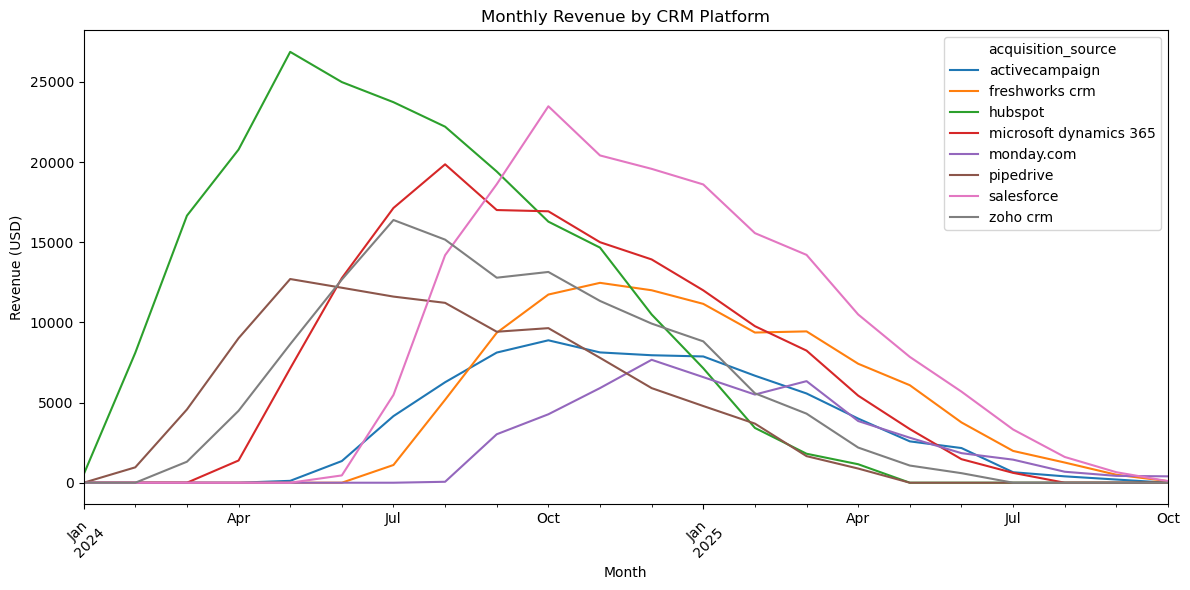

In [16]:
monthly_revenue.T.plot(figsize=(12,6),title="Monthly Revenue by CRM Platform")
plt.ylabel("Revenue (USD)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the graph , we can see that HubSpot made most money in the early time, peaking around mid 2024 then dropped steadily

Miscrosoft Dynamics 365, Zoho CRM and Salesforce peaked around mid to late 2024.

Others had only small peaks which ,eans they didnot made a lot of money.



In [17]:
#CRM platform performance metrics
performance_summary = merged.groupby("acquisition_source").agg({
    "monthly_revenue": "sum",
    "total_revenue_to_date": "mean",
    "customer_id": "nunique",
    "is_active": "mean"
}).rename(columns={
    "monthly_revenue": "total_revenue",
    "total_revenue_to_date": "avg_clv",
    "customer_id": "customer_count",
    "is_active": "active_ratio"
}).reset_index()

In [18]:
#Merge cost and calculate ROI
roi_df = performance_summary.merge(costs, left_on="acquisition_source", right_on="crm_platform", how="left")
roi_df["roi"] = (roi_df["total_revenue"] - roi_df["total_investment"]) / roi_df["total_investment"]

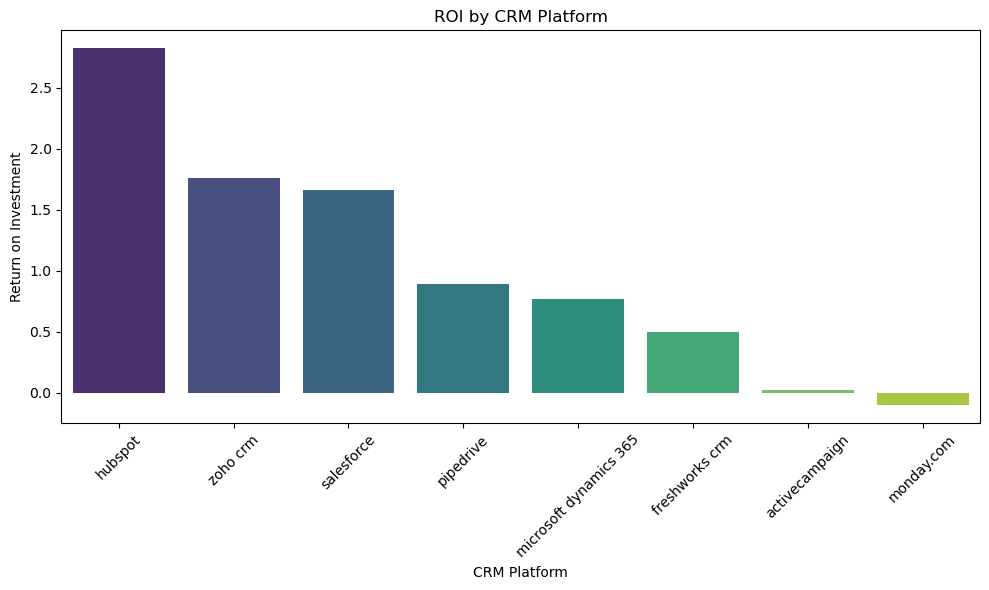

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=roi_df.sort_values("roi", ascending=False), x="acquisition_source", y="roi", palette="viridis")
plt.title("ROI by CRM Platform")
plt.ylabel("Return on Investment")
plt.xlabel("CRM Platform")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
#Top & Bottom Performers
print("\nTop 3 Platforms by ROI:\n", roi_df.sort_values("roi", ascending=False).head(3))
print("\nBottom 2 Platforms by ROI:\n", roi_df.sort_values("roi").head(2))


Top 3 Platforms by ROI:
   acquisition_source  total_revenue      avg_clv  customer_count  \
2            hubspot       218247.0  1031.378647             290   
7           zoho crm       128427.0  1096.939646             188   
6         salesforce       180315.0  1077.497869             251   

   active_ratio crm_platform  development_cost  marketing_spend  \
2      0.920130      hubspot             16814            23153   
7      0.880847     zoho crm             12003            16651   
6      0.859190   salesforce             20159            23379   

   partnership_fees  maintenance_cost  total_investment  ongoing_monthly_cost  \
2              7059             10055             57081                  3055   
7             11106              6775             46535                  1325   
6             18252              5921             67711                  3428   

        roi  
2  2.823461  
7  1.759794  
6  1.663009  

Bottom 2 Platforms by ROI:
   acquisition_source  

# REVENUE ATTRIBUTION

In [21]:
#CLV by acquisition source
clv_by_platform = merged.groupby("acquisition_source")["total_revenue_to_date"].mean().reset_index(name="avg_clv")
print("\nCustomer Lifetime Value by CRM:\n", clv_by_platform)


Customer Lifetime Value by CRM:
        acquisition_source      avg_clv
0          activecampaign  1058.131922
1          freshworks crm  1107.750306
2                 hubspot  1031.378647
3  microsoft dynamics 365  1109.282437
4              monday.com  1172.810742
5               pipedrive  1134.005141
6              salesforce  1077.497869
7                zoho crm  1096.939646


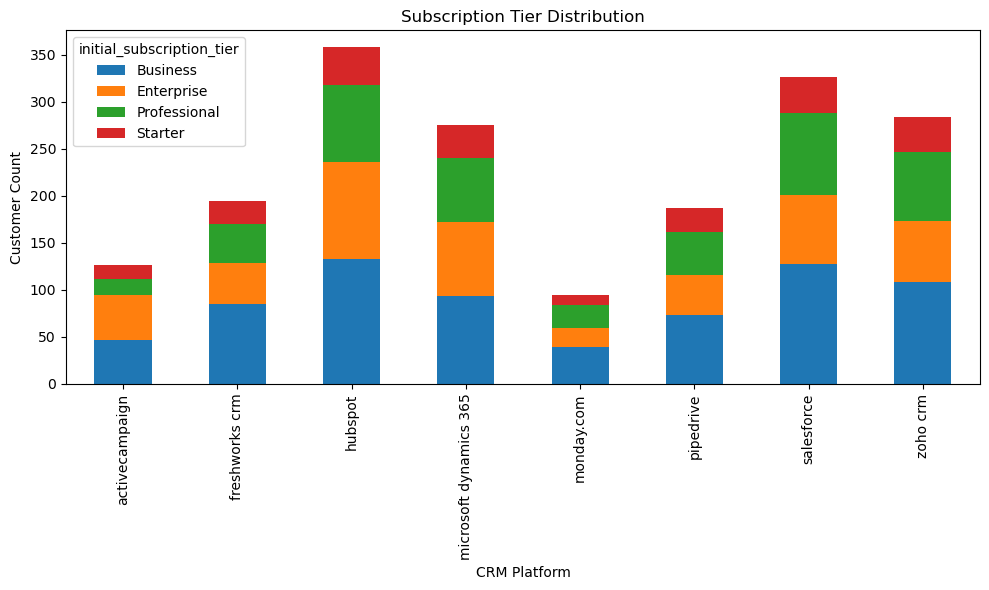

In [22]:
#subscription tier distribution
tier_dist = acquisition.groupby([
    "acquisition_source", "initial_subscription_tier"
])["customer_id"].count().unstack().fillna(0)
tier_dist.plot(kind="bar", stacked=True, figsize=(10, 6), title="Subscription Tier Distribution")
plt.xlabel("CRM Platform")
plt.ylabel("Customer Count")
plt.tight_layout()
plt.show()

# INSIGHTS AND PATTERNS

In [23]:
#Most valuable customer segments
segment_value = merged.groupby([
    "company_size", "industry"
])["total_revenue_to_date"].mean().sort_values(ascending=False).reset_index()
print("\nTop Customer Segments by Avg Revenue:\n", segment_value.head())


Top Customer Segments by Avg Revenue:
          company_size       industry  total_revenue_to_date
0        Small (1-50)      Education            1238.009259
1    Large (201-1000)  Manufacturing            1206.554960
2  Enterprise (1000+)         Retail            1197.979290
3    Large (201-1000)     Healthcare            1191.027778
4    Large (201-1000)         Retail            1164.428969


In [24]:
#correlation Matrix
correlation_features = [
    "total_revenue_to_date", "avg_monthly_revenue", "feature_usage_score",
    "churn_risk_score", "referrals_made", "support_tickets_count"
]

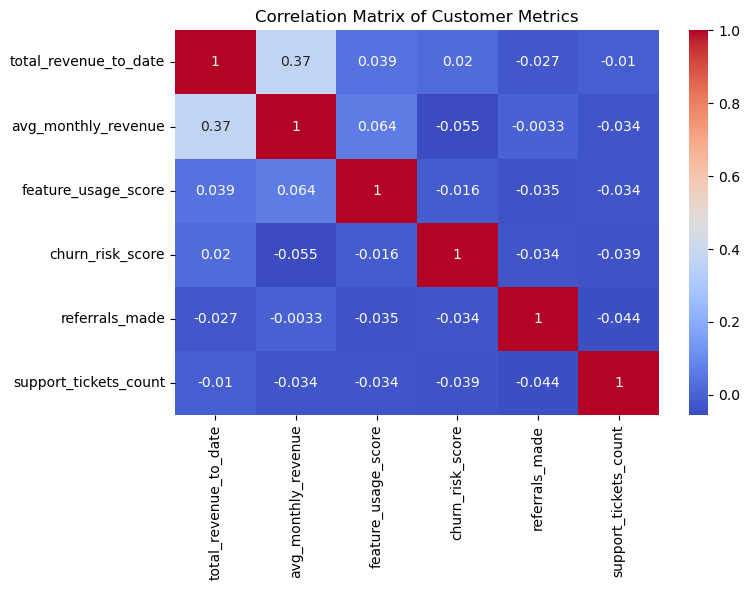

In [25]:
corr_matrix = merged[correlation_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Customer Metrics")
plt.tight_layout()
plt.show()

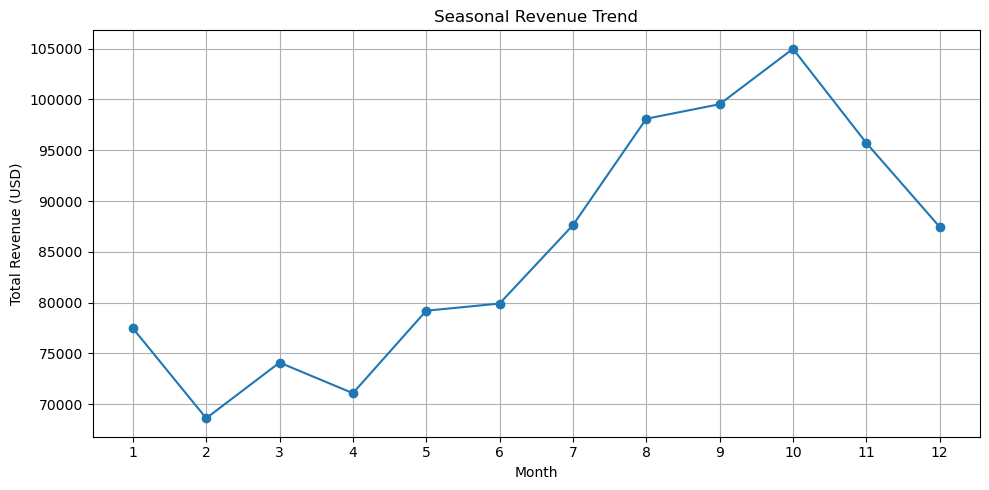

In [26]:
#Seasonal Effects on Revenue
revenue["month"] = revenue["revenue_date"].dt.month
monthly_seasonality = revenue.groupby("month")["monthly_revenue"].sum()
monthly_seasonality.plot(kind="line", marker='o', figsize=(10, 5), title="Seasonal Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue (USD)")
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()